In [2]:
import joblib
import pandas as pd
import numpy as np 
from pathlib import Path
from matplotlib import pyplot as plt
import hist
from hist import Hist

In [3]:
pred_pkls_path = '/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots/nominal'
pred_pkls_path = Path(pred_pkls_path)

In [4]:
pred_pkls_files = sorted(pred_pkls_path.rglob('pythia*_pred.pkl'))

In [6]:
sample = []
for pred_pkls_file in pred_pkls_files:
    sample_pd = joblib.load(pred_pkls_file)
    sample_pd = sample_pd[(sample_pd["jet_nTracks"] > 1) & (sample_pd["target"] != '-') & (sample_pd['event_weight'] < 50) & (sample_pd["jet_pt"] > 500) &  (sample_pd["jet_pt"] < 600)] ## for 500-600 test 

    sample.append(sample_pd.sample(frac = 0.3))

In [7]:
sample = pd.concat(sample)

In [8]:
#sample.shape
sample.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,jet_cleaning,event_weight,is_forward,is_leading,pt_idx,target,GBDT_newScore,jet_nTracks_quark_reweighting_weights,jet_nTracks_gluon_reweighting_weights,GBDT_newScore_quark_reweighting_weights,GBDT_newScore_gluon_reweighting_weights
3503173,364704.0,142856601.0,509.964264,-0.539545,11.0,0.031061,0.113670,-0.256570,21.0,2.0,0.467858,1.0,0.0,0,1,-1.801731,0.467858,0.467858,0.467858,0.467858
154976,364704.0,308711932.0,558.294739,1.817924,23.0,0.070532,0.262632,0.075590,2.0,2.0,0.189333,1.0,1.0,0,0,0.806858,0.189333,0.189333,0.189333,0.189333
438173,364704.0,112038534.0,580.109070,0.044745,25.0,0.074071,0.248431,0.144116,21.0,2.0,0.093869,0.0,0.0,0,1,0.735722,0.110767,0.096497,0.105974,0.091905
1584777,364704.0,67060050.0,576.985413,0.231658,27.0,0.039354,0.225508,0.308219,21.0,2.0,0.269256,0.0,0.0,0,1,1.692833,0.322669,0.282260,0.336472,0.284117
3814117,364704.0,69332737.0,543.460205,-0.179328,12.0,0.029121,0.159424,-0.189295,21.0,2.0,0.259912,0.0,0.0,0,1,-1.451301,0.249367,0.226275,0.254138,0.235124


In [9]:
sample_1 = sample[sample.columns[:15]]

In [8]:
sample_1.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,jet_cleaning,event_weight,is_forward,is_leading,pt_idx,target
3238411,364704.0,125988131.0,557.613403,-0.455438,14.0,0.014381,0.144946,-0.196504,3.0,2.0,0.098855,1.0,0.0,0,0
3455858,364706.0,26285773.0,1510.885986,-0.490748,33.0,0.036924,0.204487,0.208877,2.0,2.0,0.015172,0.0,1.0,5,0
6150249,364705.0,32728534.0,900.009583,0.637667,6.0,0.009031,0.108667,-0.554250,2.0,2.0,0.031934,0.0,0.0,2,0
3329447,364705.0,71931988.0,825.474121,0.666918,26.0,0.052535,0.245859,0.195831,1.0,2.0,0.046829,1.0,0.0,2,0
1919617,364704.0,103239477.0,524.123230,-0.756148,31.0,0.074126,0.268501,0.334522,21.0,2.0,0.270055,0.0,0.0,0,1


In [10]:
sample_g = sample_1[sample_1["target"] == 1]
sample_q = sample_1[sample_1["target"] == 0]

/tmp/ipykernel_183989/3822858036.py:4: RuntimeWarning: divide by zero encountered in log
  plt.stairs(np.log(pt_hist.values()), np.linspace(500,2000,51))
/tmp/ipykernel_183989/3822858036.py:9: RuntimeWarning: divide by zero encountered in log
  plt.stairs(np.log(pt_hist_g.values()), np.linspace(500,2000,51))


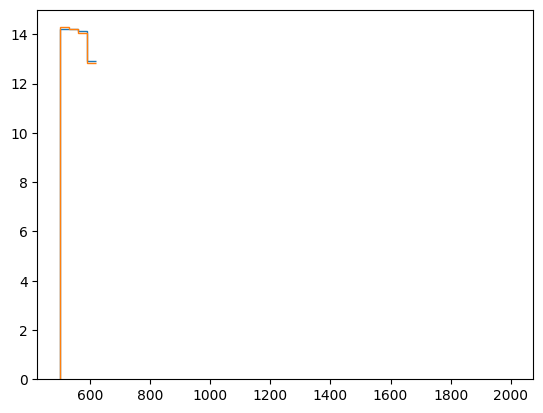

In [11]:
pt_hist =Hist(hist.axis.Regular(bins=50, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist.fill(sample_q['jet_pt'], weight=sample_q['event_weight'])
plt.stairs(np.log(pt_hist.values()), np.linspace(500,2000,51))
#pt_hist.plot()
pt_hist_g =Hist(hist.axis.Regular(bins=50, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_g.fill(sample_g['jet_pt'], weight=sample_g['event_weight'])
plt.stairs(np.log(pt_hist_g.values()), np.linspace(500,2000,51))

In [12]:
flatpt_factor = 1.0 / pt_hist.values()
flatpt_factor_g = 1.0 / pt_hist_g.values()

/tmp/ipykernel_183989/1027919798.py:1: RuntimeWarning: divide by zero encountered in divide
  flatpt_factor = 1.0 / pt_hist.values()
/tmp/ipykernel_183989/1027919798.py:2: RuntimeWarning: divide by zero encountered in divide
  flatpt_factor_g = 1.0 / pt_hist_g.values()


In [13]:
pt_idx = np.digitize(sample_q['jet_pt'], bins=np.linspace(500,2000,51)) - 1
pt_idx_g = np.digitize(sample_g['jet_pt'], bins=np.linspace(500,2000,51)) - 1

In [14]:
sample_q['flatpt_weight'] = sample_q['event_weight'] * flatpt_factor[pt_idx]
sample_g['flatpt_weight'] = sample_g['event_weight'] * flatpt_factor_g[pt_idx_g]

/tmp/ipykernel_183989/2679538622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_q['flatpt_weight'] = sample_q['event_weight'] * flatpt_factor[pt_idx]
/tmp/ipykernel_183989/2679538622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_g['flatpt_weight'] = sample_g['event_weight'] * flatpt_factor_g[pt_idx_g]


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ef6c8a30820>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

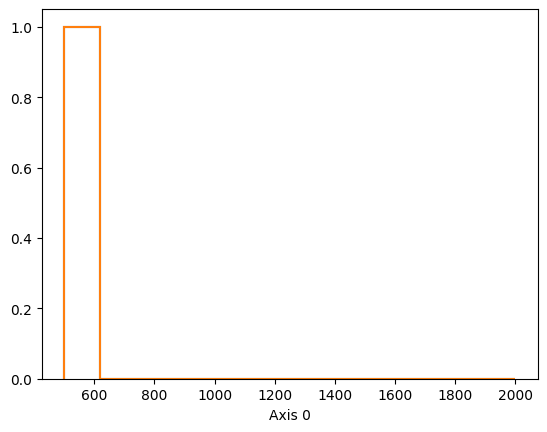

In [15]:
pt_hist_flat_pt =Hist(hist.axis.Regular(bins=50, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_flat_pt.fill(sample_q['jet_pt'], weight=sample_q['flatpt_weight'])
pt_hist_flat_pt.plot()

pt_hist_flat_pt_g =Hist(hist.axis.Regular(bins=50, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_flat_pt_g.fill(sample_g['jet_pt'], weight=sample_g['flatpt_weight'])
pt_hist_flat_pt_g.plot()

In [16]:
sample_qg=[sample_q,sample_g]
sample_all = pd.concat(sample_qg)

In [17]:
sample_all['target'] = sample_all['target'].astype(float)

In [18]:
sample_q.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,jet_cleaning,event_weight,is_forward,is_leading,pt_idx,target,flatpt_weight
154976,364704.0,308711932.0,558.294739,1.817924,23.0,0.070532,0.262632,0.075590,2.0,2.0,0.189333,1.0,1.0,0,0,1.273050e-07
669461,364704.0,321403441.0,599.431213,1.149498,23.0,0.045565,0.233431,0.156567,2.0,2.0,0.000063,1.0,0.0,0,0,1.523363e-10
322458,364704.0,53495609.0,515.183594,2.077610,18.0,0.017790,0.160939,-0.117703,2.0,2.0,0.388474,1.0,1.0,0,0,2.630536e-07
736552,364704.0,338571557.0,574.266968,-1.296267,6.0,0.022729,0.146220,-0.441226,3.0,2.0,0.649053,1.0,1.0,0,0,4.774737e-07
3773413,364704.0,341126914.0,504.458832,-2.000184,24.0,0.069396,0.270201,0.203025,2.0,2.0,0.424174,1.0,0.0,0,0,2.872278e-07


In [19]:
sample_all.to_pickle("training_sample_qg_500.pkl")

In [20]:
# %%
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
import optuna
from optuna.samplers import TPESampler
import pickle
import pandas as pd 
import joblib
import os, sys 
sys.path.append('/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/BDT_EB4/LightGBM')
from LightGBM_BDT_train import *

/global/cfs/projectdirs/atlas/wys/miniconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
training_vars = ['jet_pt', 'jet_nTracks', 'jet_trackWidth', 'jet_trackC1']
training_weight = ['flatpt_weight']

label_pt_bin = [500, 600, 800, 1000, 1200, 1500, 2000]

target_idx = sample_all.columns.get_loc('target')
y = sample_all.iloc[:, target_idx]
X = sample_all.drop(columns = 'target')

X_dev,X_test, y_dev,y_test = train_test_split(X, y, test_size=0.1, random_state=456)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1/0.9, random_state=789)


In [22]:
 
 
base_model = lgb.LGBMClassifier(random_state=42)
 #base_model.fit(X_train[training_vars], y_train, sample_weight=X_train[training_weight].to_numpy().flatten())

base_model.fit(X = X_train[training_vars], y = y_train, sample_weight=X_train[training_weight].to_numpy().flatten(),
               eval_set = [(X_val[training_vars], y_val)], eval_sample_weight = [X_val[training_weight].to_numpy().flatten()],
               eval_metric = ['binary_logloss', 'auc'])

[1]	valid_0's binary_logloss: 0.663905	valid_0's auc: 0.817623
[2]	valid_0's binary_logloss: 0.640034	valid_0's auc: 0.818904
[3]	valid_0's binary_logloss: 0.620243	valid_0's auc: 0.820303
[4]	valid_0's binary_logloss: 0.603804	valid_0's auc: 0.820914
[5]	valid_0's binary_logloss: 0.590074	valid_0's auc: 0.821217
[6]	valid_0's binary_logloss: 0.578509	valid_0's auc: 0.821538
[7]	valid_0's binary_logloss: 0.56875	valid_0's auc: 0.821784
[8]	valid_0's binary_logloss: 0.560532	valid_0's auc: 0.821928
[9]	valid_0's binary_logloss: 0.553557	valid_0's auc: 0.822144
[10]	valid_0's binary_logloss: 0.547647	valid_0's auc: 0.822289
[11]	valid_0's binary_logloss: 0.542624	valid_0's auc: 0.82247
[12]	valid_0's binary_logloss: 0.538354	valid_0's auc: 0.822606
[13]	valid_0's binary_logloss: 0.534685	valid_0's auc: 0.822765
[14]	valid_0's binary_logloss: 0.531575	valid_0's auc: 0.822885
[15]	valid_0's binary_logloss: 0.528924	valid_0's auc: 0.822984
[16]	valid_0's binary_logloss: 0.526653	valid_0's a

KeyboardInterrupt: 